<a href="https://colab.research.google.com/github/VandyALV23/ALVIGPFIRST/blob/main/HW3_section03_data_process_dim_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/section03_data_process_dim_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Section 3:__ Data Processing, Dimension Reduction and Visualization

## load packages and github repo

In [ ]:
!git clone https://github.com/Ken-Lau-Lab/single-cell-lectures  # for Colab users

In [ ]:
!pip install scanpy

In [ ]:
!pip install matplotlib==3.7.1

In [ ]:
!pip install leidenalg

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### read in data

In [ ]:
dat = sc.read('single-cell-lectures/data/Example_Data_L3.h5ad')
#dat = sc.read('./data/Example_Data_L3.h5ad')

## Data Processing

In [ ]:
def normalization( dat_ct):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dat_ct)
    dat_ct.X = np.arcsinh(dat_ct.X).copy()
    dat_ct.layers['arcsinh'] = dat_ct.X.copy()
    sc.pp.scale(dat_ct)

    return dat_ct

In [ ]:
dat.raw = dat.copy() # save a raw layer

In [ ]:
dat.to_df().iloc[100:105, 9000:9010]

,RASSF7,RAVER1,RAVER2,RB1,RB1CC1,RBBP4,RBBP5,RBBP6,RBBP7,RBBP8
TGACTGGTGCACCCTAACC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
TGACGTAGAAGCTTTAATC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
AGCCAAGATTGGTATGA,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
TGAGGTCTGACCCGTGTTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
TAGCCTCGGAGCGGTA,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
normalization( dat)

AnnData object with n_obs × n_vars = 461 × 13583
    var: 'mean', 'std'
    layers: 'arcsinh'

In [ ]:
dat.to_df().iloc[100:105, 9000:9010]

,RASSF7,RAVER1,RAVER2,RB1,RB1CC1,RBBP4,RBBP5,RBBP6,RBBP7,RBBP8
TGACTGGTGCACCCTAACC,-0.280488,-0.103334,-0.502596,-0.377638,0.523756,-0.386509,-0.280821,-0.424114,-0.323547,2.204609
TGACGTAGAAGCTTTAATC,-0.280488,-0.103334,-0.502596,-0.377638,-0.482523,-0.386509,-0.280821,2.788866,4.165315,-0.251074
AGCCAAGATTGGTATGA,-0.280488,14.854852,2.757277,-0.377638,-0.482523,2.772768,-0.280821,-0.424114,3.728795,-0.251074
TGAGGTCTGACCCGTGTTT,-0.280488,-0.103334,-0.502596,-0.377638,-0.482523,-0.386509,-0.280821,4.042510,-0.323547,-0.251074
TAGCCTCGGAGCGGTA,3.184663,-0.103334,0.877694,2.208826,-0.482523,-0.386509,-0.280821,-0.424114,-0.323547,-0.251074


## Dimension Reduction

In [ ]:
n_neighbors = int( np.sqrt(dat.n_obs) ) # an optimal number for k in KNN

In [ ]:
sc.tl.pca(dat, return_info=False, use_highly_variable = False ) #PCA

In [ ]:
sc.pp.neighbors( dat, n_neighbors= n_neighbors , n_pcs=50, ) # make neighborhood graph

In [ ]:
sc.tl.umap(dat, random_state=0) # make UMAP

In [ ]:
sc.tl.leiden( dat, resolution = 0.7)

In [ ]:
dat

AnnData object with n_obs × n_vars = 461 × 13583
    obs: 'leiden'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh'
    obsp: 'distances', 'connectivities'

In [ ]:
dat.varm["PCs"].shape

(13583, 50)

In [ ]:
dat.varm["PCs"][0:5, 0:5]

array([[ 0.01534656,  0.01825429, -0.00214323,  0.00939627, -0.00665326],
       [-0.00977972, -0.00542018, -0.00046088,  0.0055393 ,  0.00218566],
       [ 0.00187079,  0.00866739, -0.00260812,  0.00233425, -0.00119323],
       [ 0.00299765,  0.00336016,  0.01155719, -0.00334567,  0.00940649],
       [ 0.00128106,  0.00175568,  0.00772175, -0.00012081,  0.00594929]],
      dtype=float32)

## Visualization

In [ ]:
sc.set_figure_params(figsize=[4,4])

In [ ]:
ne_markers = ['CD8A',  'CD4', 'JCHAIN', 'COL1A1'] # Non-epithelial cell markers

In [ ]:
markers = ['GUCA2A',  'OLFM4', 'MKI67',  'MUC2', 'CHGA', 'DCLK1'] # epithelial cell type markers

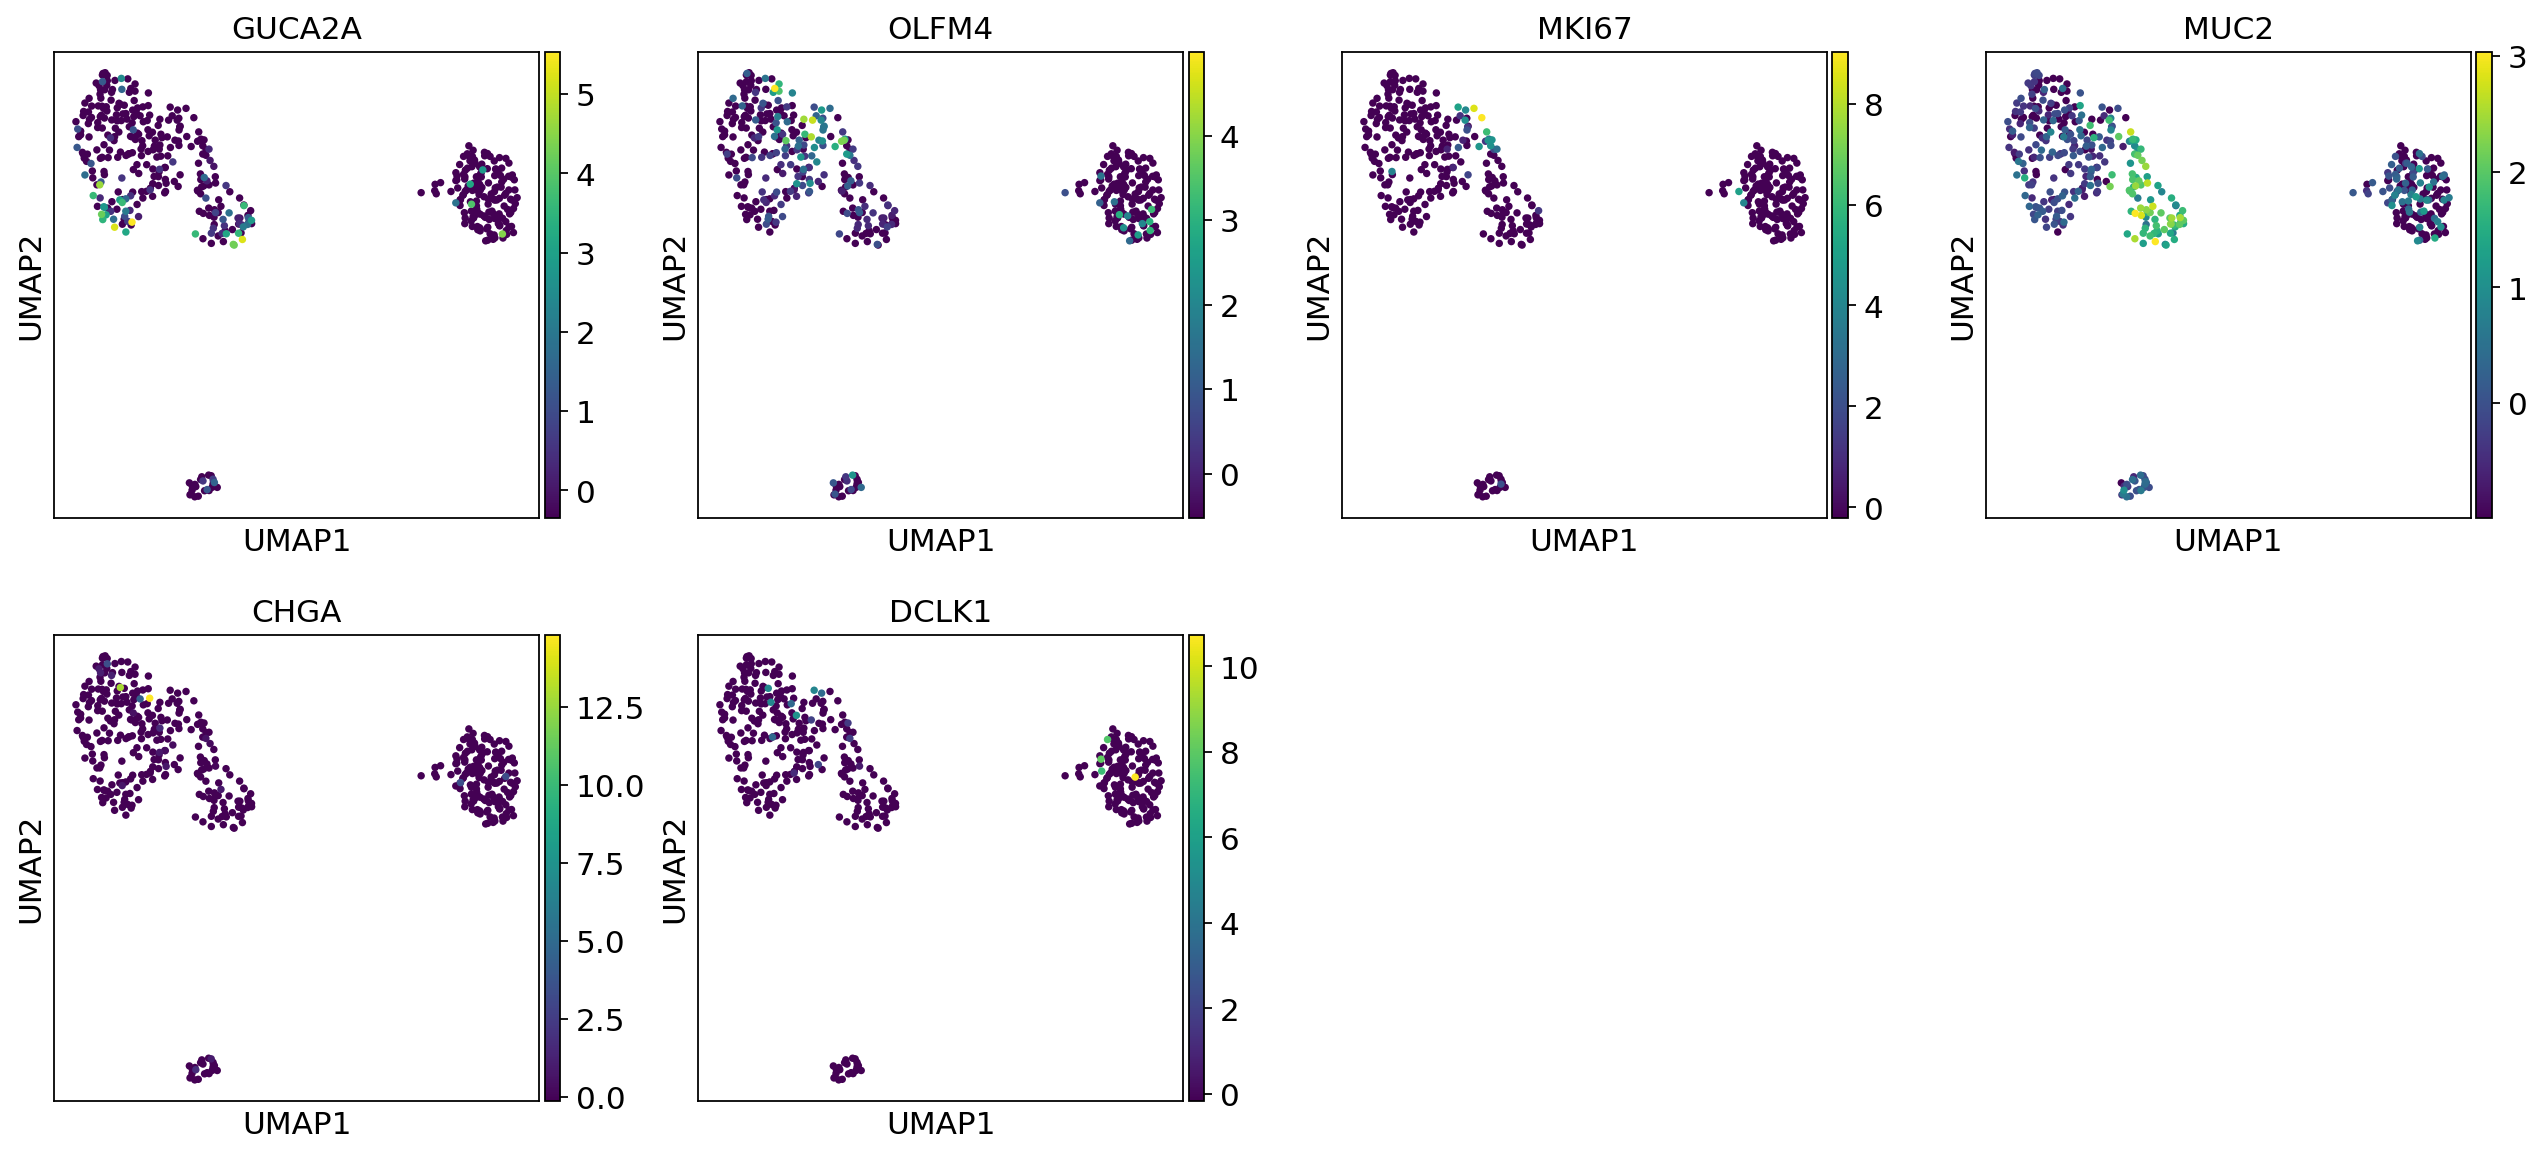

In [ ]:
sc.pl.umap( dat, color = markers, use_raw = False, s = 45, cmap = 'viridis')

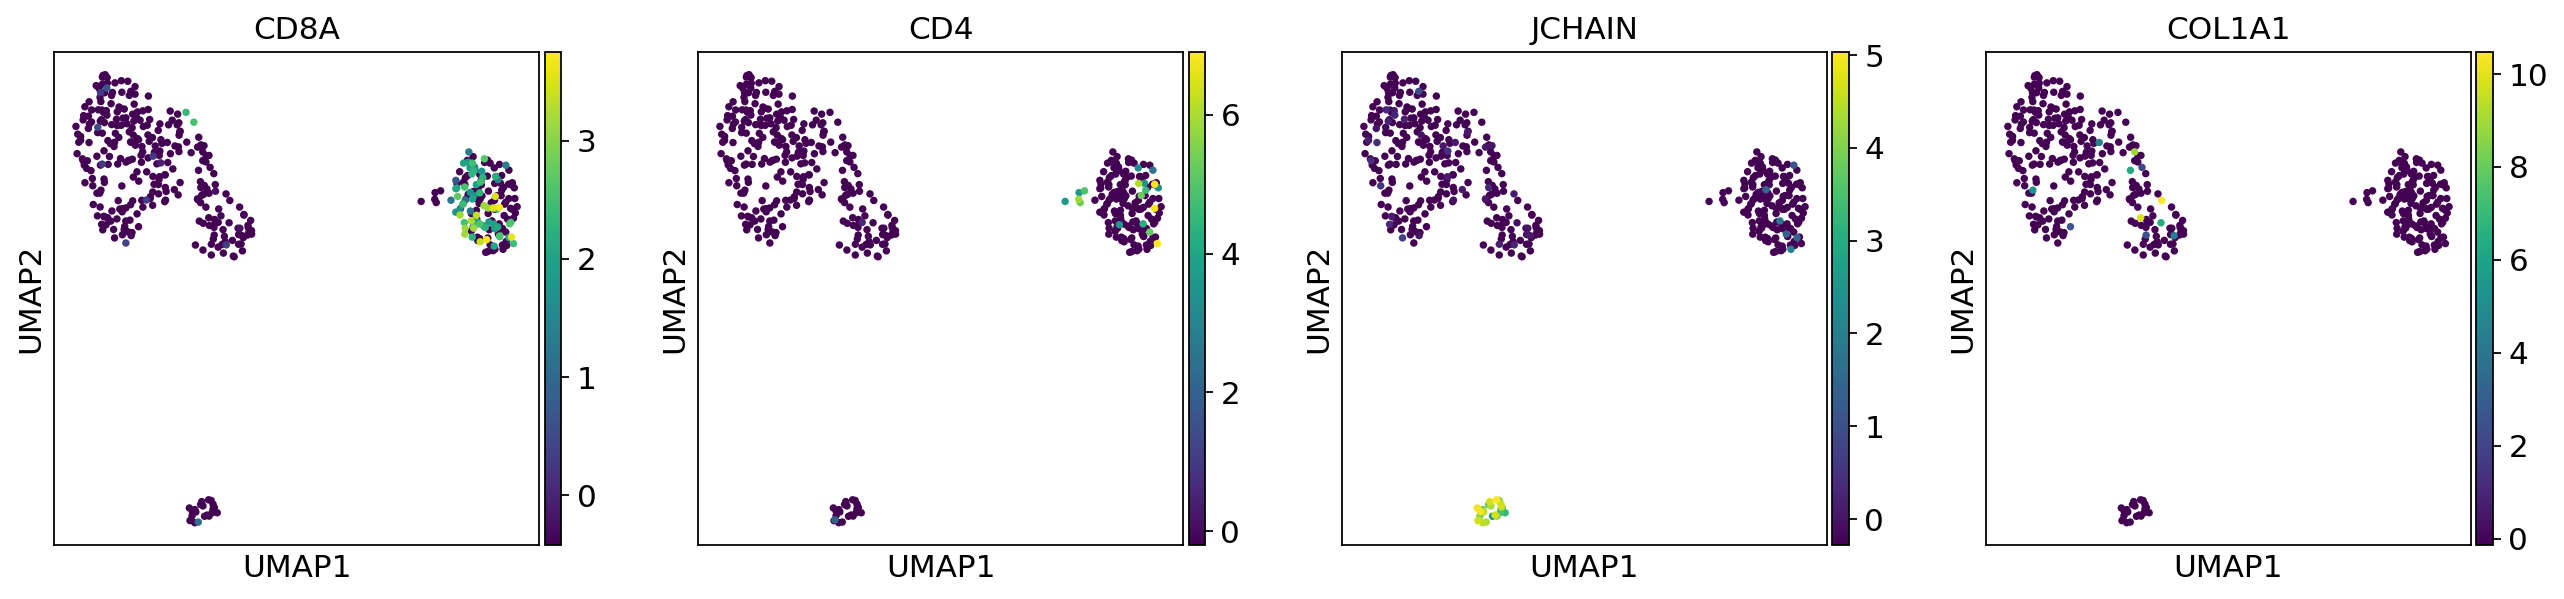

In [ ]:
sc.pl.umap( dat, color = ne_markers , use_raw = False, s = 45, cmap = 'viridis' )

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


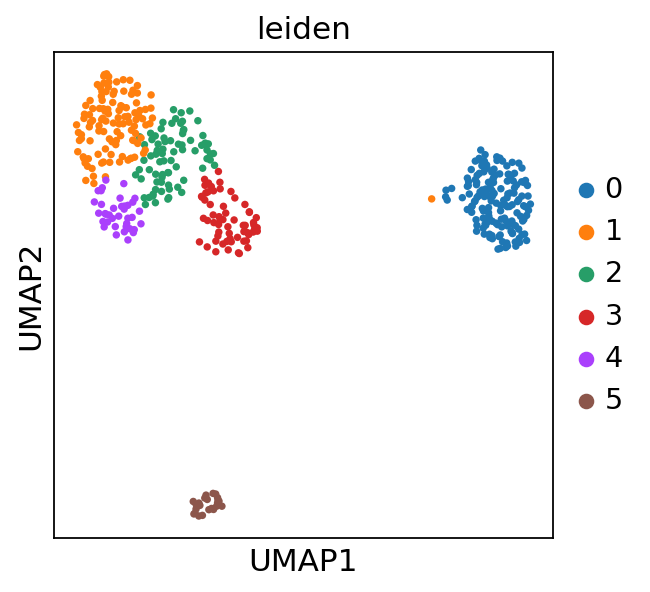

In [ ]:
sc.pl.umap(dat, color = 'leiden', s = 45 )

## Differential gene expression
- For clusters computed from unsupervised algorithm, we want to know what they mean biologically
- DGE provides insight into cell states, subtypes or novel cell clusters etc.

In [ ]:
sc.tl.rank_genes_groups( dat, groupby='leiden', use_raw= False, layer='arcsinh', key_added='leiden_cluster', method= 'wilcoxon' )

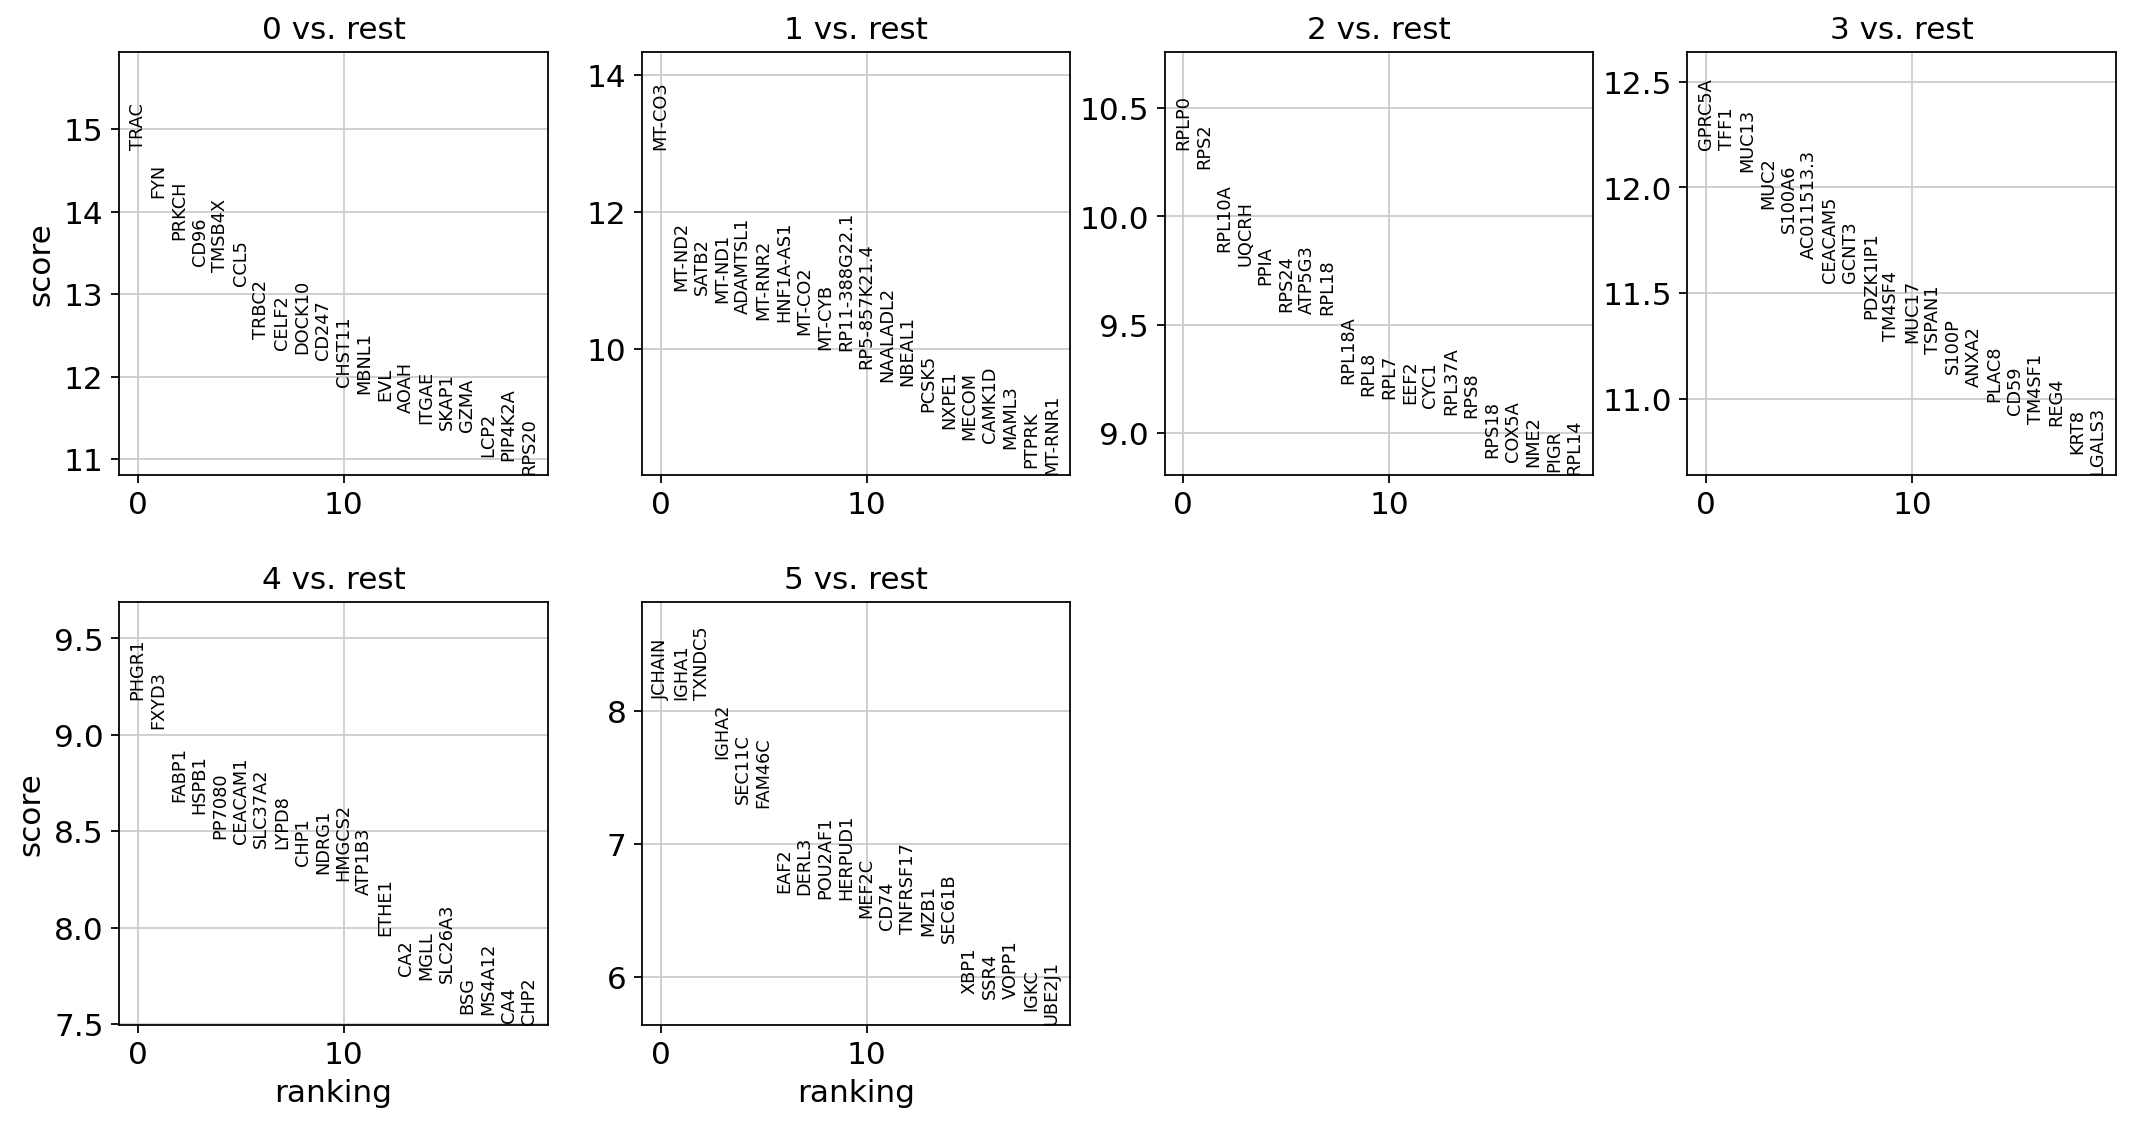

In [ ]:
sc.pl.rank_genes_groups( dat, key='leiden_cluster', sharey= False )